## HR Analytics Project- Understanding the Attrition in HR


Project Description:
This project is to understand the attrition in HR eventhough there is proper training given and still there is an attrition in the HR Role and we need to determine the main reasons that causes the attrition in HR domain


Import Libraries

In [255]:


import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import cross_val_score


from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [256]:
HR_attr=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
HR_attr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


The HR Employee attrition Dataset has 1470 rows and 35 columns

In [257]:
HR_attr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [258]:
HR_attr.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [259]:
HR_attr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Age: Employee's age.

BusinessTravel: Frequency of business travel (e.g., Travel_Rarely, Travel_Frequently)

DailyRate: Daily rate of pay

Department: Employee's department (e.g., Sales, Research & Development)

DistanceFromHome: Distance from the employee's home to the workplace

Education: Employee's education level (ranging from 'Below College' to 'Doctor')

EducationField: Field of education

EnvironmentSatisfaction: Satisfaction with the work environment

Gender: Employee's gender

HourlyRate: Hourly rate of pay

JobInvolvement: Level of job involvement

JobLevel: Employee's job level

JobRole: Employee's job role

JobSatisfaction: Job satisfaction level

MaritalStatus: Marital status of the employee

MonthlyIncome: Monthly income of the employee

MonthlyRate: Monthly rate

NumCompaniesWorked: Number of companies the employee has worked for

Over18: Indicates if the employee is over 18 years old

OverTime: Whether the employee works overtime

PercentSalaryHike: Percentage increase in salary

PerformanceRating: Performance rating

RelationshipSatisfaction: Satisfaction with work relationships

StandardHours: Standard working hours

StockOptionLevel: Stock option level

TotalWorkingYears: Total years of work experience

TrainingTimesLastYear: Number of training sessions attended last year

WorkLifeBalance: Work-life balance satisfaction

YearsAtCompany: Number of years with the current company

YearsInCurrentRole: Number of years in the current role

YearsSinceLastPromotion: Number of years since the last promotion

YearsWithCurrManager: Number of years with the current manager

Attrition: The target variable indicating whether the employee has left the company (Yes/No)

In [260]:
HR_attr.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [261]:
HR_attr.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no null values in this dataset

In [262]:
HR_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

There are 9 categorical columns and 26 numberical columns(datatype is int)

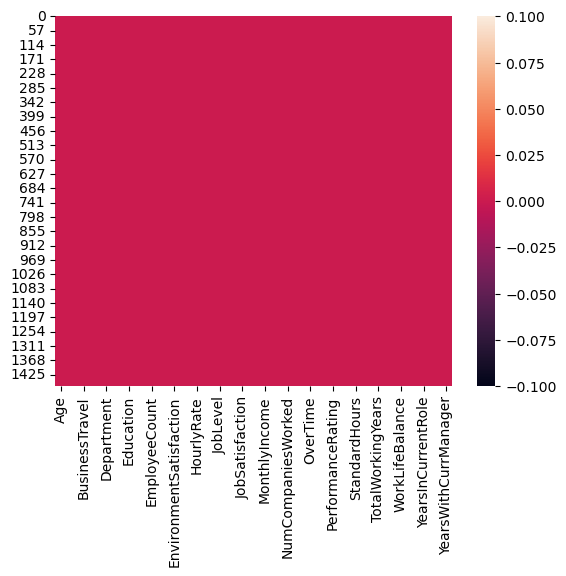

In [263]:
sns.heatmap(HR_attr.isnull())
plt.show()

In [264]:
HR_attr.duplicated().sum()

0

There are no duplicate values.

In [265]:
HR_attr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [266]:
HR_attr.describe(include="all")

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


#### Exploratory Data Analysis

<Axes: xlabel='Attrition', ylabel='count'>

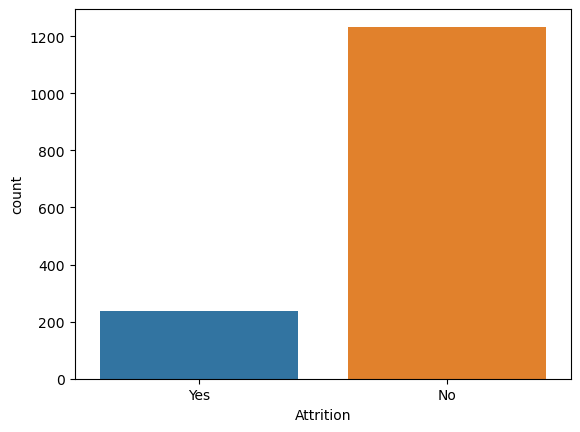

In [267]:
sns.countplot(x='Attrition',data=HR_attr)

In [268]:
HR_attr['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

The attrition "yes" has less count (237) when compared to no. 


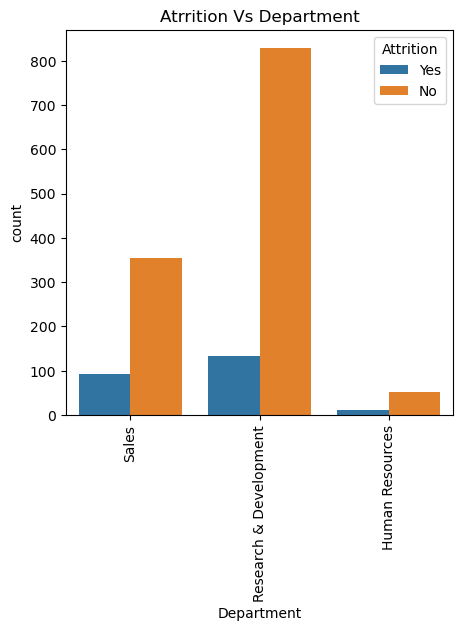

In [269]:
plt.figure(figsize=(5,5))
sns.countplot(x='Department', hue='Attrition',data=HR_attr)
plt.xticks(rotation=90)
plt.title('Atrrition Vs Department')
plt.show()

The attrition rate is high in department "Research &Development Department"

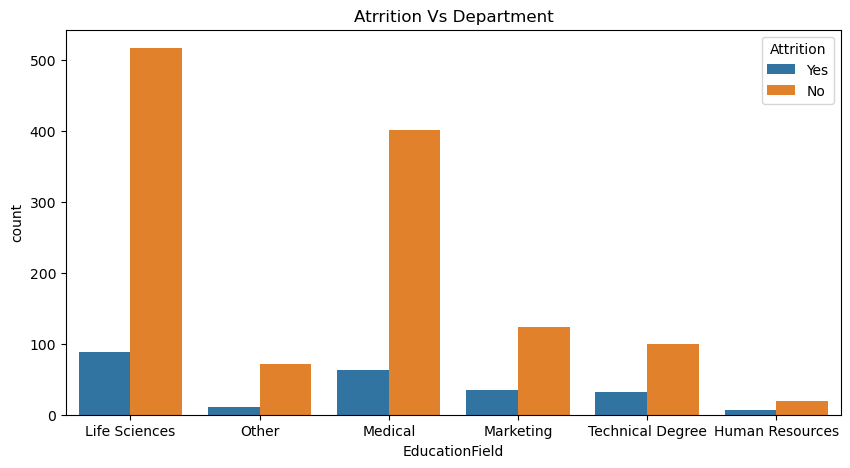

In [270]:
plt.figure(figsize=(10,5))
sns.countplot(x='EducationField', hue='Attrition',data=HR_attr)
plt.title('Atrrition Vs Department')
plt.show()

The attrition rate is high in EducationField "Life Sciences"

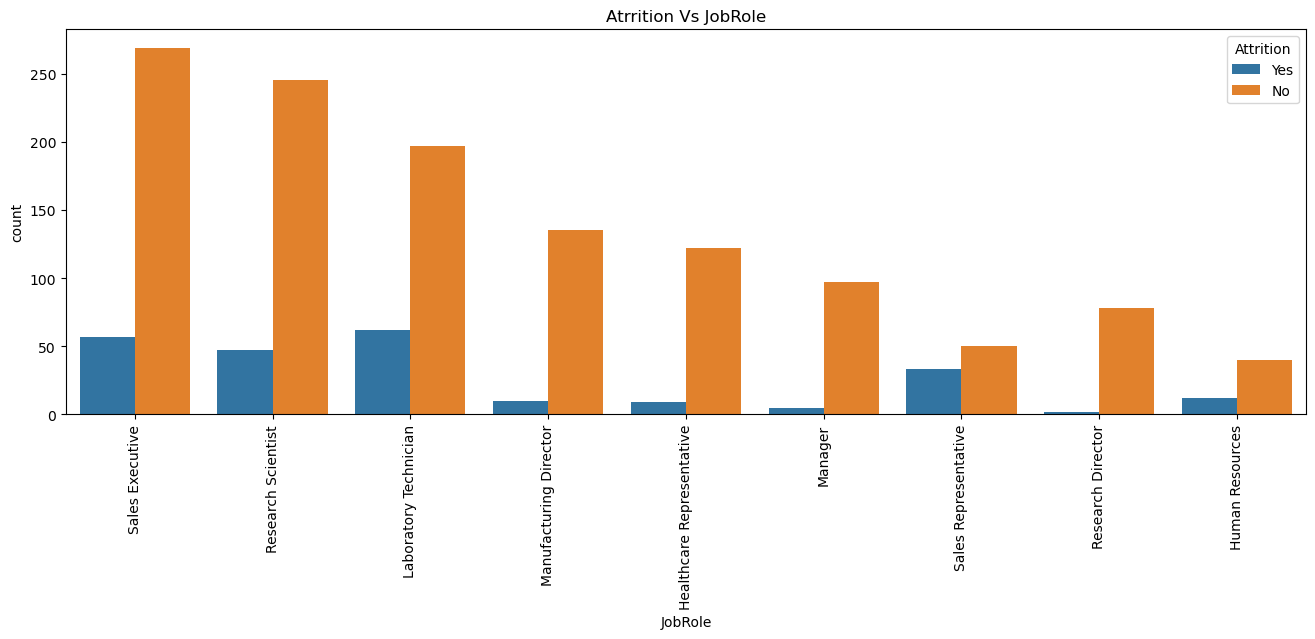

In [271]:
plt.figure(figsize=(16,5))
sns.countplot(x='JobRole', hue='Attrition',data=HR_attr)
plt.xticks(rotation=90)
plt.title('Atrrition Vs JobRole')
plt.show()

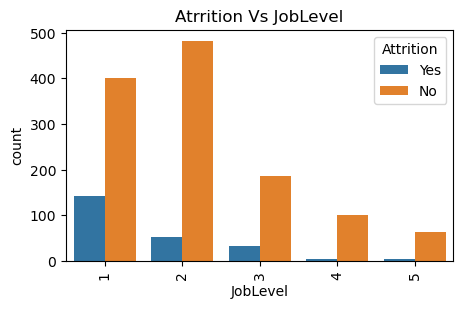

In [272]:
plt.figure(figsize=(5,3))
sns.countplot(x='JobLevel', hue='Attrition',data=HR_attr)
plt.xticks(rotation=90)
plt.title('Atrrition Vs JobLevel')
plt.show()

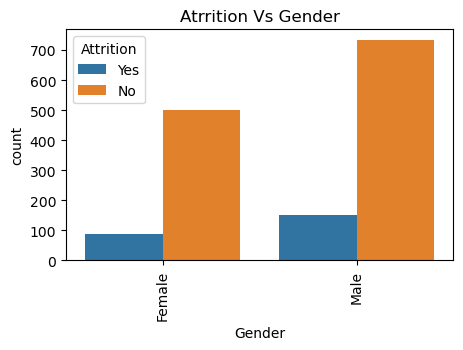

In [273]:
plt.figure(figsize=(5,3))
sns.countplot(x='Gender', hue='Attrition',data=HR_attr)
plt.xticks(rotation=90)
plt.title('Atrrition Vs Gender')
plt.show()

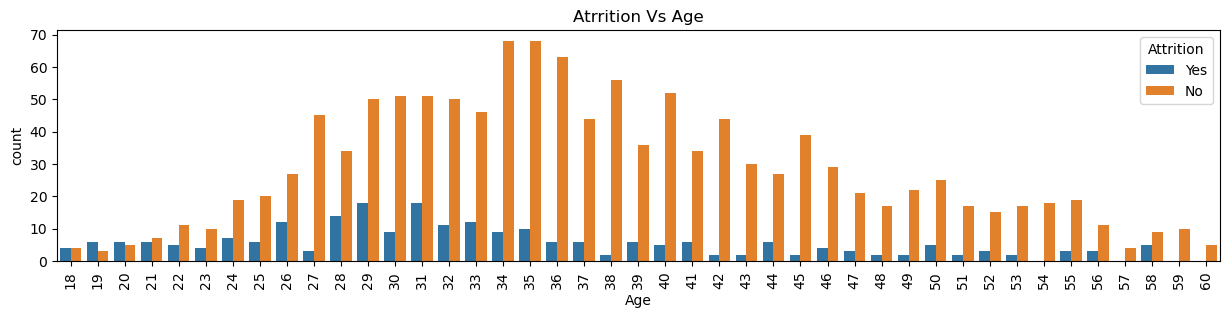

In [274]:
plt.figure(figsize=(15,3))
sns.countplot(x='Age', hue='Attrition',data=HR_attr)
plt.xticks(rotation=90)
plt.title('Atrrition Vs Age')
plt.show()



The maximum attrition age is around 29 to 31

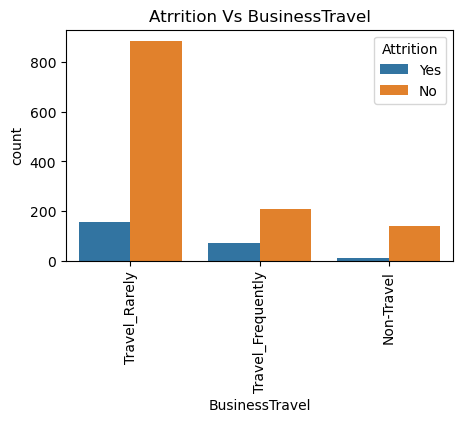

In [275]:
plt.figure(figsize=(5,3))
sns.countplot(x='BusinessTravel', hue='Attrition',data=HR_attr)
plt.xticks(rotation=90)
plt.title('Atrrition Vs BusinessTravel')
plt.show()


Travel Rarely has the highest count when compared to others

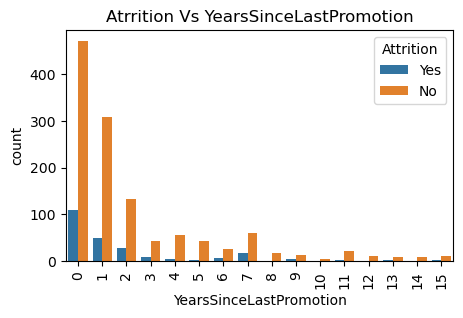

In [276]:
plt.figure(figsize=(5,3))
sns.countplot(x='YearsSinceLastPromotion', hue='Attrition',data=HR_attr)
plt.xticks(rotation=90)
plt.title('Atrrition Vs YearsSinceLastPromotion')
plt.show()

YearsSinceLastPromotion with '0' has the highest count when compared to others

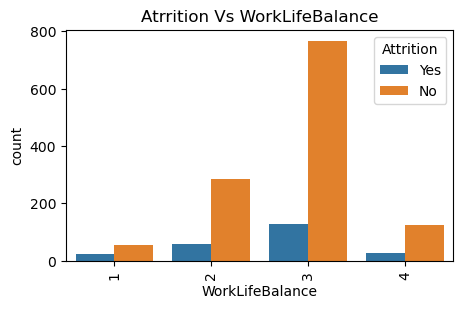

In [277]:


plt.figure(figsize=(5,3))
sns.countplot(x='WorkLifeBalance', hue='Attrition',data=HR_attr)
plt.xticks(rotation=90)
plt.title('Atrrition Vs WorkLifeBalance')
plt.show()

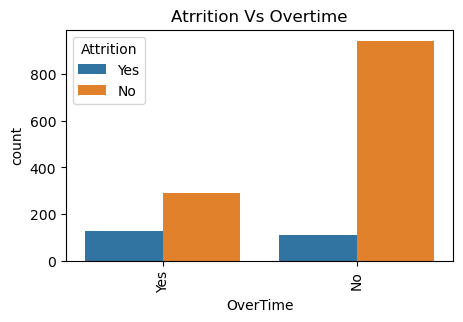

In [278]:
plt.figure(figsize=(5,3))
sns.countplot(x='OverTime', hue='Attrition',data=HR_attr)
plt.xticks(rotation=90)
plt.title('Atrrition Vs Overtime')
plt.show()

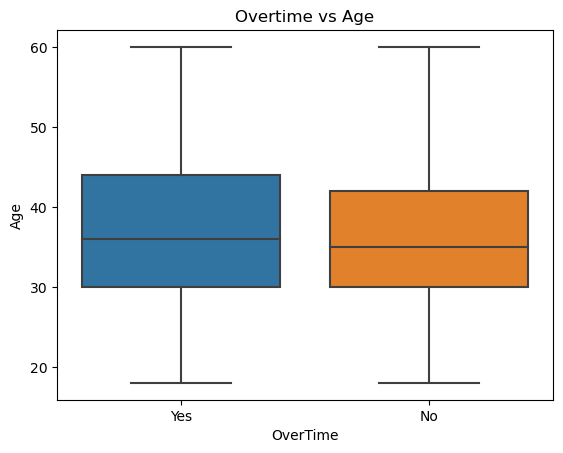

In [279]:
sns.boxplot(x='OverTime', y= 'Age', data=HR_attr)
plt.title('Overtime vs Age')
plt.show()

Distribution Of Employee Attrition in the Company

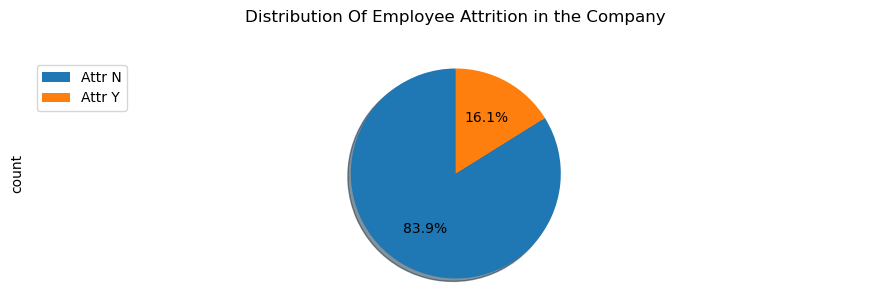

In [344]:
labels='Attr N','Attr Y'
HR_attr['Attrition'].astype(str).value_counts().plot(kind='pie',figsize=(11,3),
                                                   autopct='%1.1f%%',
                                                   startangle=90,shadow=True,labels=None)
plt.title('Distribution Of Employee Attrition in the Company',y=1.12)
plt.axis('equal')
plt.legend(labels=labels,loc='upper left')
plt.show()

Out of 1470 Employees,16 % of the Employees left their job  and 84% prefers to continues with their job

In [281]:
HR_attr.drop(['StandardHours','EmployeeCount','Over18','EmployeeNumber','StockOptionLevel'], axis = 1,inplace=True)

Dropping this column does not affect the Attrition

In [345]:
HR_attr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.522140,1,1,0.759289,0,-1.494085,-0.916940,0,-0.706596,1,...,-1.488918,-7.632783e-17,-1.529513,-0.244305,-2.579073,-2.144446,0.139692,0.205562,-1.094862,0.490147
1,1.276411,0,2,-1.334597,1,0.243416,-1.771185,0,0.208597,1,...,1.679689,4.232725e-16,1.229016,0.052495,0.217384,0.276821,0.762660,0.883888,0.096854,0.909635
2,0.102091,1,1,1.340365,1,-1.031215,-0.916940,5,1.209516,1,...,0.201133,-7.632783e-17,-0.700130,-0.410500,0.217384,0.276821,-2.229592,-1.596434,-1.094862,-1.550156
3,-0.353971,0,2,1.379936,1,-0.700347,1.082871,0,1.209516,1,...,-1.488918,-7.632783e-17,0.225164,-0.244305,0.217384,0.276821,0.482432,0.883888,0.905592,-1.550156
4,-1.123755,0,1,-0.453941,1,-1.031215,-1.771185,1,-1.518118,1,...,-0.948760,-7.632783e-17,1.229016,-0.592063,0.217384,0.276821,-0.951540,-0.446645,0.607464,-0.406881


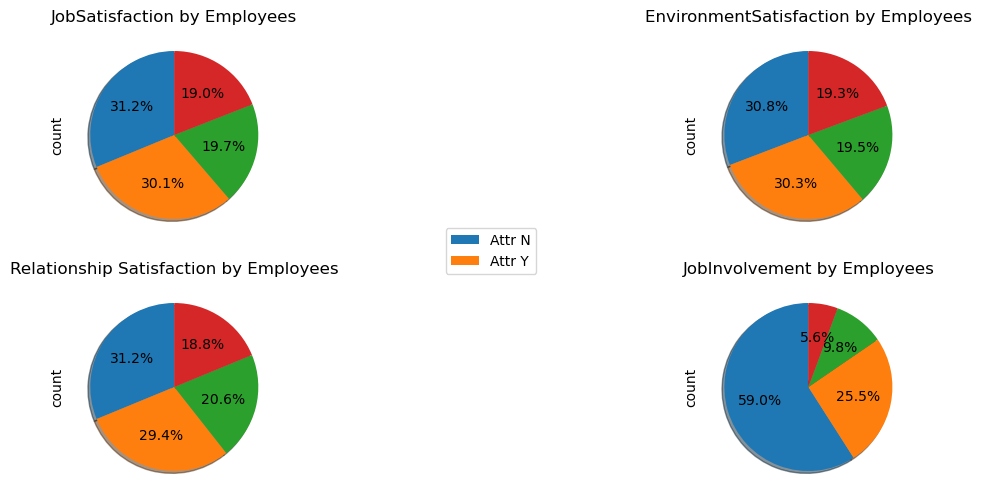

In [346]:
fig=plt.figure()

ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)
ax3=fig.add_subplot(223)
ax4=fig.add_subplot(224)

Labesl='Low','Medium','High','Very high'

HR_attr['JobSatisfaction'].astype(str).value_counts().plot(kind='pie',figsize=(11,3),
                                                   autopct='%1.1f%%',
                                                   startangle=90,shadow=True,labels=None,ax=ax1)
ax1.set_title('JobSatisfaction by Employees')
fig.legend(labels=labels,loc='center')


HR_attr['EnvironmentSatisfaction'].astype(str).value_counts().plot(kind='pie',figsize=(15,6),
                                                   autopct='%1.1f%%',
                                                   startangle=90,shadow=True,labels=None,ax=ax2)
ax2.set_title('EnvironmentSatisfaction by Employees')

HR_attr['RelationshipSatisfaction'].astype(str).value_counts().plot(kind='pie',figsize=(15,6),
                                                   autopct='%1.1f%%',
                                                   startangle=90,shadow=True,labels=None,ax=ax3)
ax3.set_title('Relationship Satisfaction by Employees')

HR_attr['JobInvolvement'].astype(str).value_counts().plot(kind='pie',figsize=(15,6),
                                                   autopct='%1.1f%%',
                                                   startangle=90,shadow=True,labels=None,ax=ax4)
ax4.set_title('JobInvolvement by Employees')

plt.show()

Most of the Employess are not satisfied with jobSatisfaction,Environment, JobInvolvement and Relationship Satisfaction

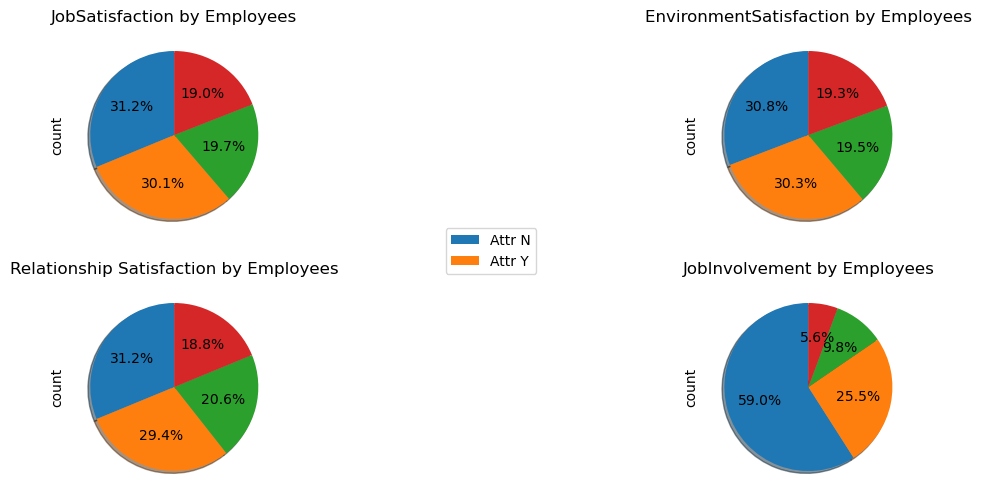

In [284]:
fig=plt.figure()

ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)
ax3=fig.add_subplot(223)
ax4=fig.add_subplot(224)

Labesl='Low','Medium','High','Very high'

HR_attr['JobSatisfaction'].astype(str).value_counts().plot(kind='pie',figsize=(11,3),
                                                   autopct='%1.1f%%',
                                                   startangle=90,shadow=True,labels=None,ax=ax1)
ax1.set_title('JobSatisfaction by Employees')
fig.legend(labels=labels,loc='center')


HR_attr['EnvironmentSatisfaction'].astype(str).value_counts().plot(kind='pie',figsize=(15,6),
                                                   autopct='%1.1f%%',
                                                   startangle=90,shadow=True,labels=None,ax=ax2)
ax2.set_title('EnvironmentSatisfaction by Employees')

HR_attr['RelationshipSatisfaction'].astype(str).value_counts().plot(kind='pie',figsize=(15,6),
                                                   autopct='%1.1f%%',
                                                   startangle=90,shadow=True,labels=None,ax=ax3)
ax3.set_title('Relationship Satisfaction by Employees')

HR_attr['JobInvolvement'].astype(str).value_counts().plot(kind='pie',figsize=(15,6),
                                                   autopct='%1.1f%%',
                                                   startangle=90,shadow=True,labels=None,ax=ax4)
ax4.set_title('JobInvolvement by Employees')

plt.show()

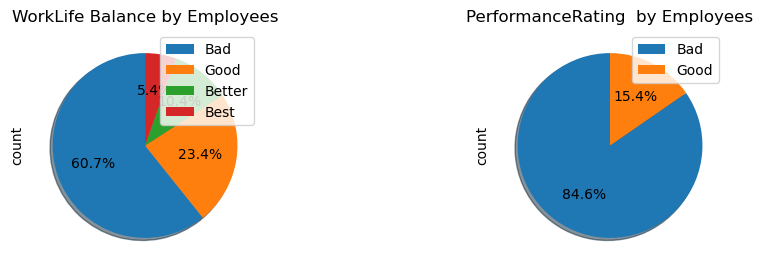

In [285]:
fig2=plt.figure()
ax5=fig2.add_subplot(121)
ax6=fig2.add_subplot(122)

label1='Bad','Good','Better','Best'
label2='Low','Good','Excellent','Outstanding'



HR_attr['WorkLifeBalance'].astype(str).value_counts().plot(kind='pie',figsize=(11,3),
                                                   autopct='%1.1f%%',
                                                   startangle=90,shadow=True,labels=None,ax=ax5)
ax5.set_title('WorkLife Balance by Employees')
ax5.legend(labels=label1,loc='upper right')

ax3.set_title('Relationship Satisfaction by Employees')

HR_attr['PerformanceRating'].astype(str).value_counts().plot(kind='pie',figsize=(11,3),
                                                   autopct='%1.1f%%',
                                                   startangle=90,shadow=True,labels=None,ax=ax6)
ax6.set_title('PerformanceRating  by Employees')
ax6.legend(labels=label1,loc='upper right')

plt.show()

We observed that 85% of the Employee has bas performance rating.
Around 60% of the employee has bad worklif balance.

#### Analysis Of Business Travel

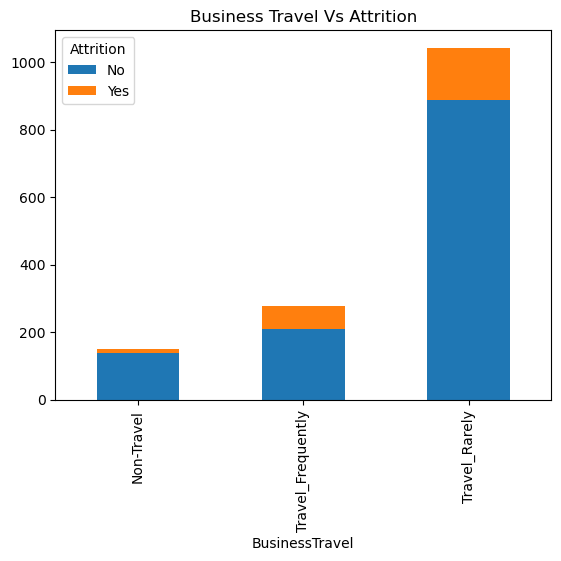

In [286]:
Bussiness_Travel=HR_attr.groupby("BusinessTravel")['Attrition'].value_counts(normalize=False).unstack()
Bussiness_Travel.plot(kind='bar',alpha=1,stacked='False')
plt.title('Business Travel Vs Attrition')
plt.show()

Employee who travel has high risk of attrition.


#### Analysis of Work Experience:

Work experience columns are 'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','TotalWorkingYears','Attrition'

In [287]:
Work_exp=HR_attr[['YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','TotalWorkingYears','Attrition']]
Work_exp.head()

,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingYears,Attrition
0,6,4,0,5,8,Yes
1,10,7,1,7,10,No
2,0,0,0,0,7,Yes
3,8,7,3,0,8,No
4,2,2,2,2,6,No


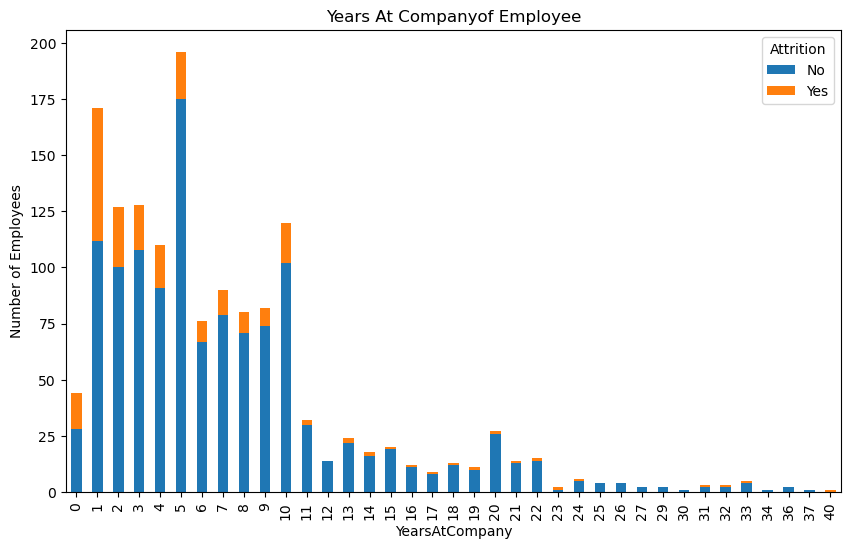

In [288]:
Years_company=HR_attr.groupby("YearsAtCompany")['Attrition'].value_counts(normalize=False).unstack()
Years_company.plot(kind='bar',stacked='False',figsize=(10,6))
plt.title('Years At Companyof Employee')
plt.ylabel('Number of Employees')
plt.show()

It shows that the employee who has less experience quits their job. 

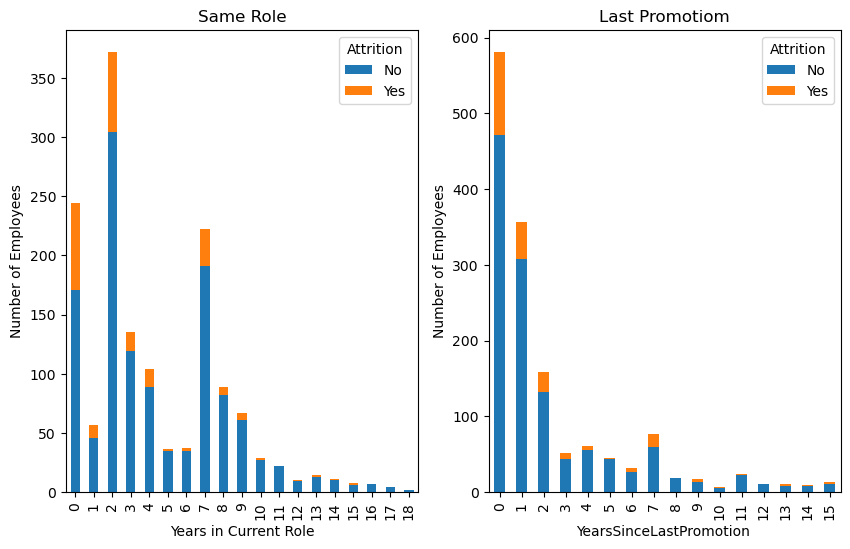

In [289]:
Yearscurrentrole=HR_attr.groupby("YearsInCurrentRole")['Attrition'].value_counts(normalize=False).unstack()
Yearssincelastpromotion=HR_attr.groupby("YearsSinceLastPromotion")['Attrition'].value_counts(normalize=False).unstack()

fig=plt.figure()

ax0=fig.add_subplot(121)
ax1=fig.add_subplot(122)

Yearscurrentrole.plot(kind='bar',stacked='False',figsize=(10,6),ax=ax0)
ax0.set_title('Same Role')
ax0.set_xlabel('Years in Current Role')
ax0.set_ylabel('Number of Employees')

Yearssincelastpromotion.plot(kind='bar',stacked='False',figsize=(10,6),ax=ax1)
ax1.set_title('Last Promotiom')
ax1.set_xlabel('YearsSinceLastPromotion ')
ax1.set_ylabel('Number of Employees')

plt.show()

In [290]:
cat_col = HR_attr.select_dtypes(include=['object']).columns
print("Categorical columns are:",cat_col)
print("\n")

num_col = HR_attr.select_dtypes(include=['int64']).columns
print("Numerical columns are:",num_col)

Categorical columns are: Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')


Numerical columns are: Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


## Converting Categorical Data into Numerical Data

In [291]:
HR_attr.Attrition.replace({'Yes': 1, 'No': 0}, inplace=True)

HR_attr.BusinessTravel.replace({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently':2}, inplace=True)

HR_attr.Department.replace({'Sales': 0, 'Research & Development': 1, 'Human Resources': 2, }, inplace=True)

HR_attr.EducationField.replace({'Life Sciences': 0, 'Medical': 1, 'Marketing': 2, 
                             'Technical Degree': 3, 'Human Resources': 4, 'Other':5},inplace = True)


HR_attr.Gender.replace({'Male': 1, 'Female': 1}, inplace=True)

HR_attr.JobRole.replace({'Sales Executive': 0, 'Research Scientist': 1, 'Laboratory Technician': 2,
                     'Manufacturing Director': 3, 'Healthcare Representative': 4, 'Manager': 5,
                     'Sales Representative': 6, 'Research Director': 7, 'Human Resources': 8}, inplace=True)

HR_attr.MaritalStatus.replace({'Single': 0, 'Married': 1, 'Divorced': 2}, inplace=True)
HR_attr.OverTime.replace({'Yes': 1, 'No': 0}, inplace=True)

In [292]:
HR_attr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,0,1,2,0,2,1,...,11,3,1,8,0,1,6,4,0,5
1,49,0,2,279,1,8,1,0,3,1,...,23,4,4,10,3,3,10,7,1,7
2,37,1,1,1373,1,2,2,5,4,1,...,15,3,2,7,3,3,0,0,0,0
3,33,0,2,1392,1,3,4,0,4,1,...,11,3,3,8,3,3,8,7,3,0
4,27,0,1,591,1,2,1,1,1,1,...,12,3,4,6,3,3,2,2,2,2


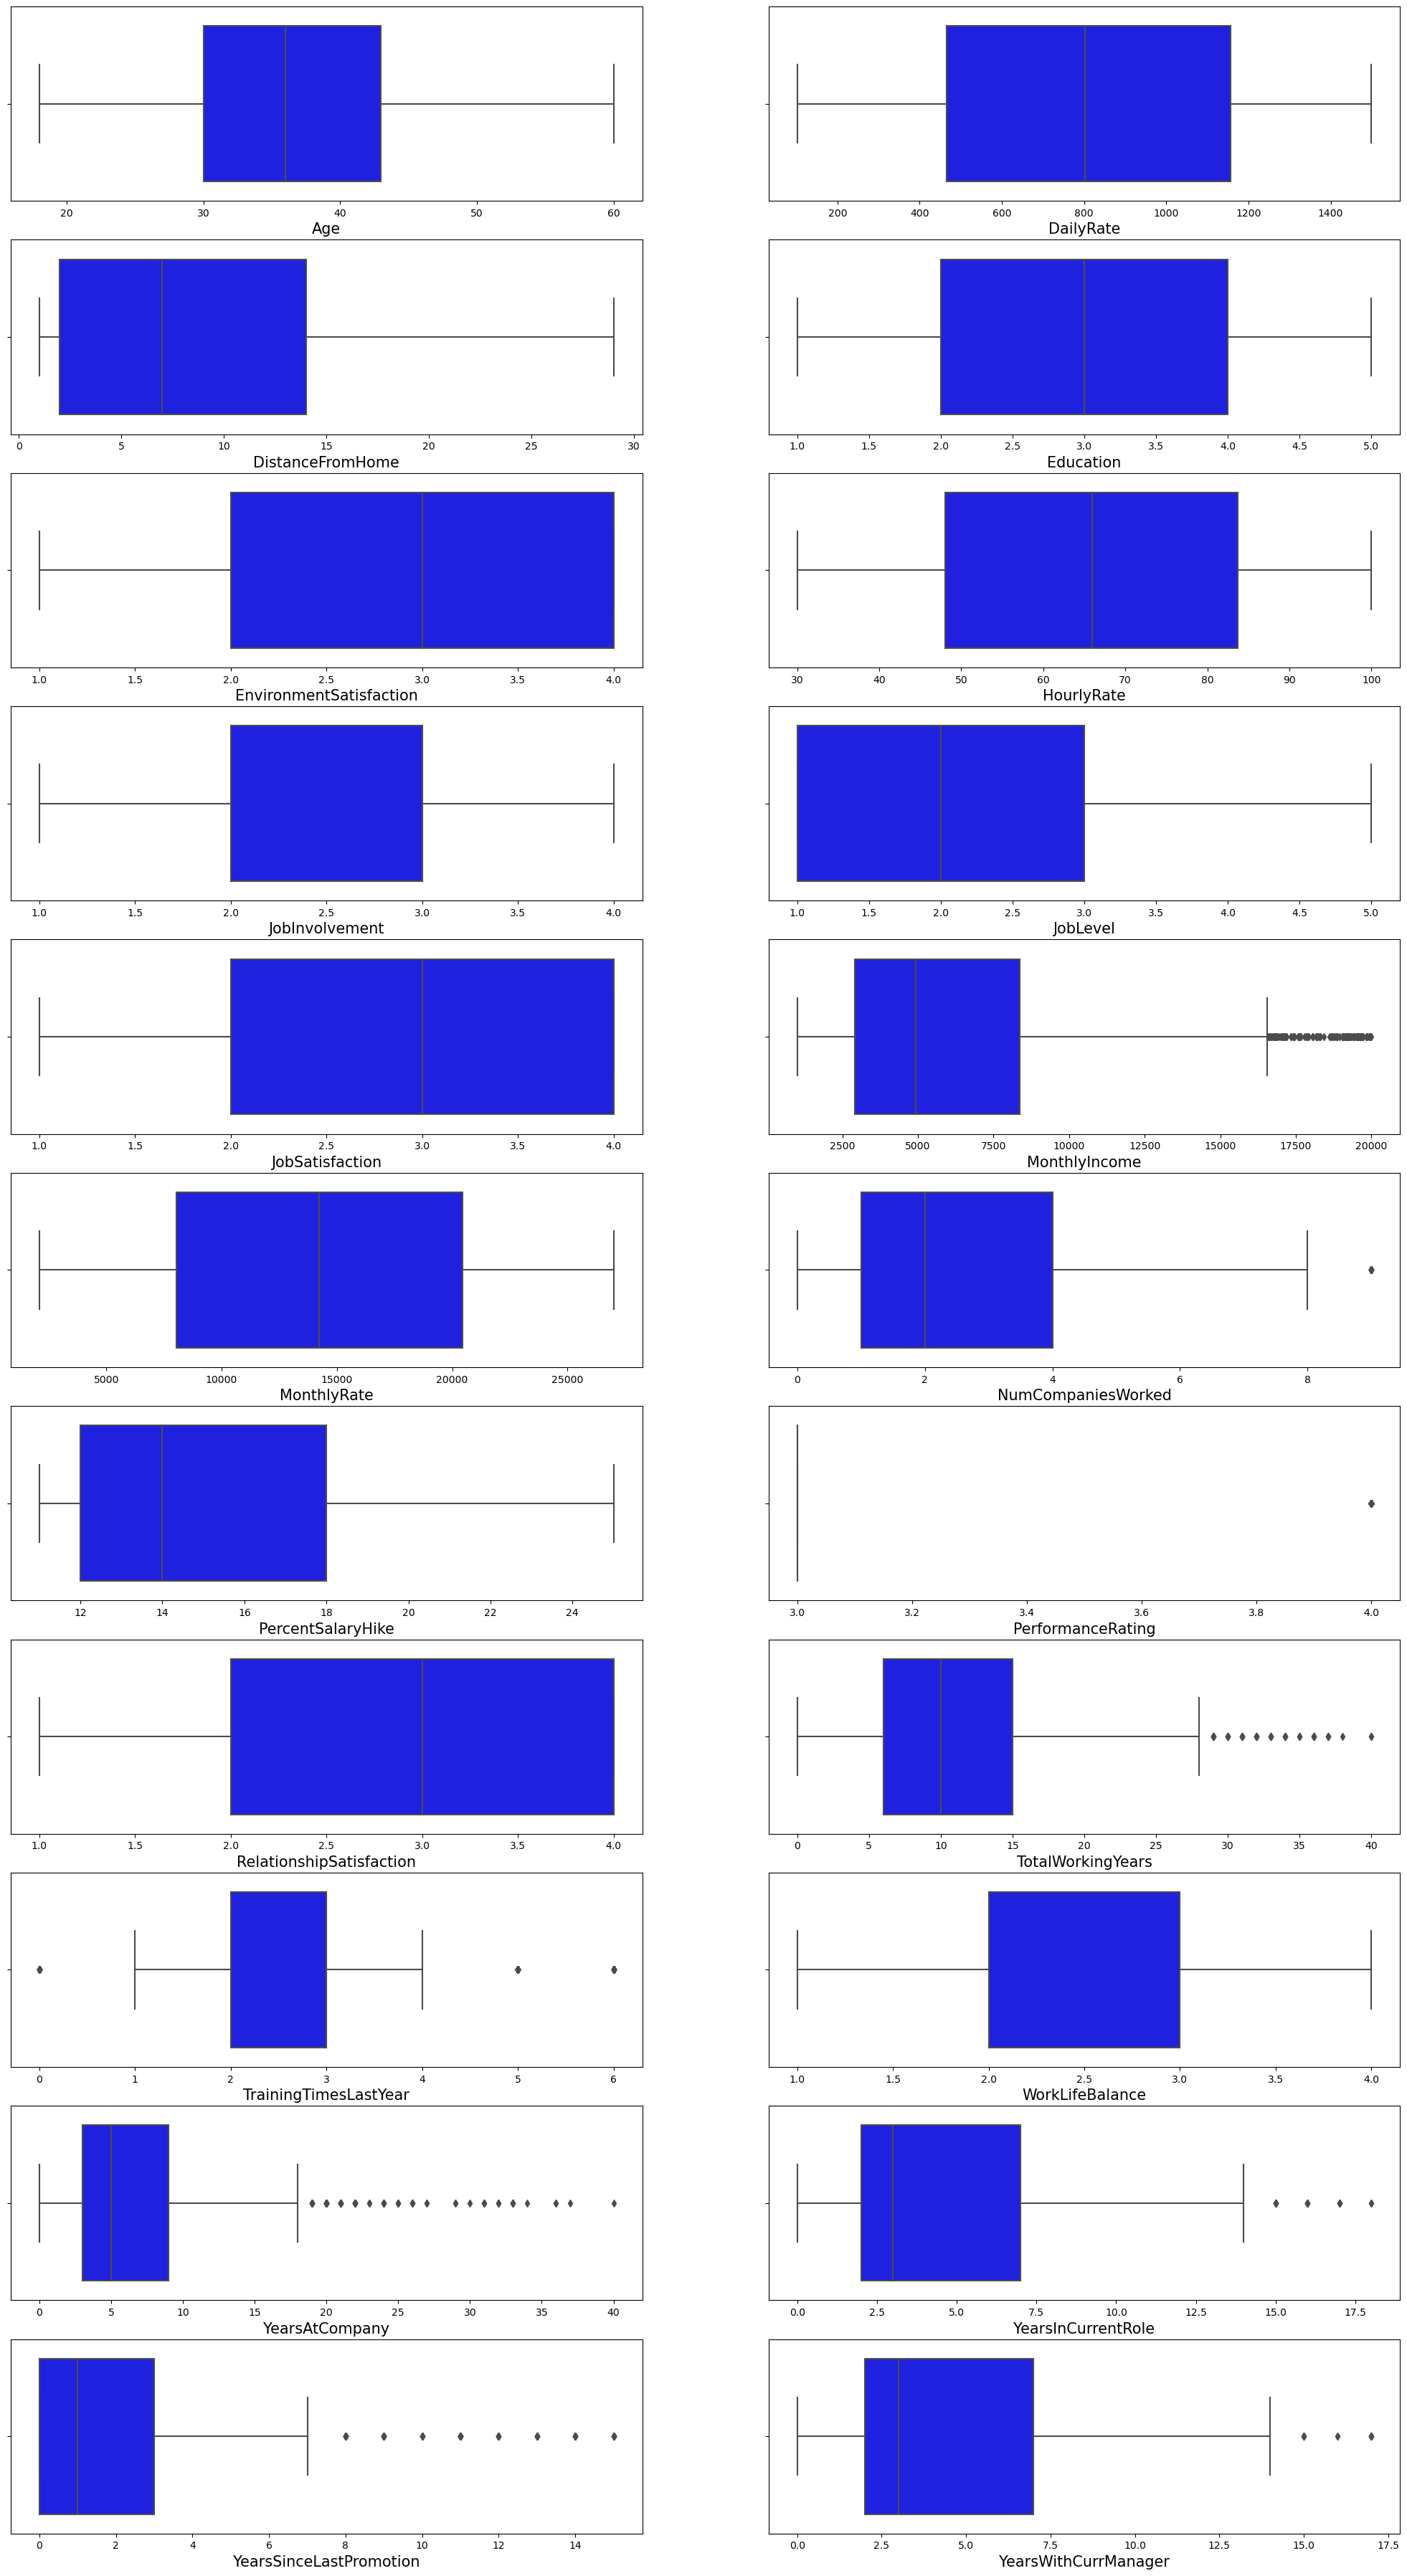

In [293]:
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in num_col:
    if plotnumber <=23:
        ax = plt.subplot(12,2,plotnumber)
        sns.boxplot(x= column, data=HR_attr, color = 'blue')
        plt.xlabel(column,fontsize=15)

    plotnumber +=1
plt.show()

Outliers are present in columns 'YearsSinceLastPromotion','YearsWithCurrManager','YearsInCurrentRole','YearsAtCompany','TotalWorkingYears'.

In [294]:
HR_attr_cor =HR_attr.corr()
HR_attr_cor

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,-0.011807,0.010661,0.031882,-0.001686,0.208034,-0.035850,0.010146,NaN,...,0.003634,0.001904,0.053535,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.127006,-0.056652,-0.063991,0.077924,-0.031373,0.051567,-0.103369,NaN,...,-0.013478,0.002889,-0.045872,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,-0.011807,0.127006,1.000000,-0.015539,0.002640,-0.009696,-0.008670,-0.015275,-0.011310,NaN,...,-0.025727,0.001683,0.008926,0.007972,0.016357,0.004209,0.005212,-0.005336,0.005222,-0.000229
DailyRate,0.010661,-0.056652,-0.015539,1.000000,-0.007109,-0.004985,-0.016806,-0.018291,0.018355,NaN,...,0.022704,0.000473,0.007846,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,0.031882,-0.063991,0.002640,-0.007109,1.000000,-0.017225,-0.007996,0.006415,0.019395,NaN,...,0.007840,0.024604,0.022414,0.015762,-0.036875,-0.026383,-0.022920,-0.056315,-0.040061,-0.034282
DistanceFromHome,-0.001686,0.077924,-0.009696,-0.004985,-0.017225,1.000000,0.021042,0.005369,-0.016075,NaN,...,0.040235,0.027110,0.006557,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.008670,-0.016806,-0.007996,0.021042,1.000000,0.033467,-0.027128,NaN,...,-0.011111,-0.024539,-0.009118,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.035850,0.051567,-0.015275,-0.018291,0.006415,0.005369,0.033467,1.000000,0.061149,NaN,...,-0.019401,-0.014649,-0.000440,-0.027703,-0.005588,0.047322,-0.022710,-0.015588,-0.029528,-0.010316
EnvironmentSatisfaction,0.010146,-0.103369,-0.011310,0.018355,0.019395,-0.016075,-0.027128,0.061149,1.000000,NaN,...,-0.031701,-0.029548,0.007665,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

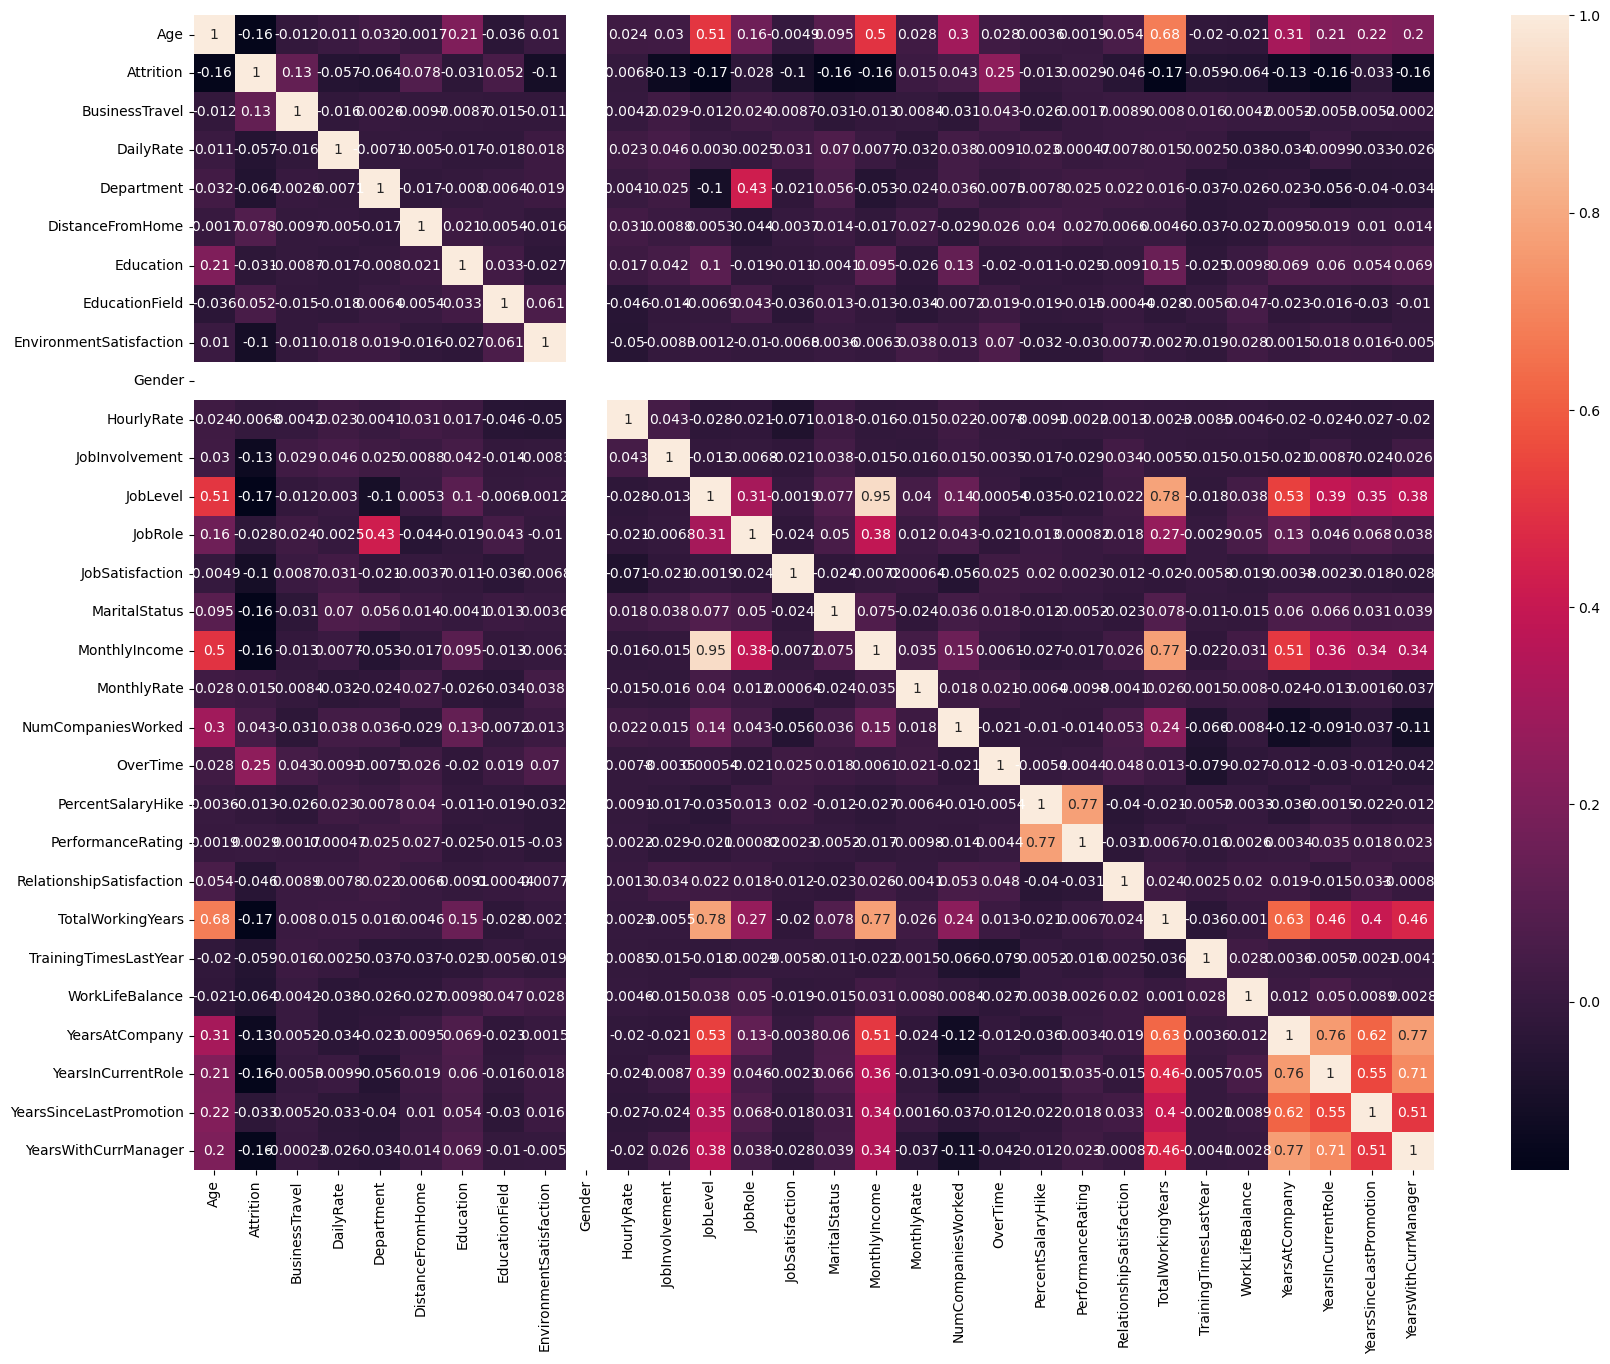

In [297]:
plt.figure(figsize=(20,15))
sns.heatmap(HR_attr_cor,annot=True)

In [303]:
from sklearn.preprocessing import StandardScaler, PowerTransformer

numerical_data = HR_attr[num_col]
pt = PowerTransformer(method='yeo-johnson')
numerical_data_transformed = pt.fit_transform(numerical_data)
numerical_data_transformed_df = pd.DataFrame(numerical_data_transformed, columns=num_col)
HR_attr[num_col] = numerical_data_transformed_df
HR_attr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.522140,1,1,0.759289,0,-1.494085,-0.916940,0,-0.706596,1,...,-1.488918,-7.632783e-17,-1.529513,-0.244305,-2.579073,-2.144446,0.139692,0.205562,-1.094862,0.490147
1,1.276411,0,2,-1.334597,1,0.243416,-1.771185,0,0.208597,1,...,1.679689,4.232725e-16,1.229016,0.052495,0.217384,0.276821,0.762660,0.883888,0.096854,0.909635
2,0.102091,1,1,1.340365,1,-1.031215,-0.916940,5,1.209516,1,...,0.201133,-7.632783e-17,-0.700130,-0.410500,0.217384,0.276821,-2.229592,-1.596434,-1.094862,-1.550156
3,-0.353971,0,2,1.379936,1,-0.700347,1.082871,0,1.209516,1,...,-1.488918,-7.632783e-17,0.225164,-0.244305,0.217384,0.276821,0.482432,0.883888,0.905592,-1.550156
4,-1.123755,0,1,-0.453941,1,-1.031215,-1.771185,1,-1.518118,1,...,-0.948760,-7.632783e-17,1.229016,-0.592063,0.217384,0.276821,-0.951540,-0.446645,0.607464,-0.406881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.008279,0,2,0.264672,1,1.407126,-0.916940,1,0.208597,1,...,0.719724,-7.632783e-17,0.225164,0.859893,0.217384,0.276821,-0.066114,-0.446645,-1.094862,-0.053000
1466,0.316210,0,1,-0.397219,1,-0.050827,-1.771185,1,1.209516,1,...,0.201133,-7.632783e-17,-1.529513,-0.090665,1.615639,0.276821,0.320677,0.883888,0.096854,0.909635
1467,-1.123755,0,1,-1.751713,1,-0.442291,0.040522,0,-0.706596,1,...,1.281630,4.232725e-16,-0.700130,-0.592063,-2.579073,0.276821,0.139692,-0.446645,-1.094862,-0.053000
1468,1.276411,0,2,0.583235,0,-1.031215,0.040522,1,1.209516,1,...,-0.121307,-7.632783e-17,1.229016,0.859893,0.217384,-1.108624,0.628829,0.682995,-1.094862,1.090110


#### Data Splitting

In [305]:
x = HR_attr.drop(columns=["Attrition"])

# Target
y= HR_attr["Attrition"]

In [306]:
x.shape,y.shape

((1470, 29), (1470,))

#### Feature Scaling

In [313]:
from sklearn.preprocessing import StandardScaler


sc=StandardScaler()
x=sc.fit_transform(x)


#### Balancing data using SMOTE

In [317]:
y.value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

In [319]:
sm=SMOTE()
x,y=sm.fit_resample(x,y)

#### Model Prediction

In [321]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=42)
Lg=LogisticRegression()
dtc=DecisionTreeClassifier(criterion='entropy')
gnb=GaussianNB()
ada = AdaBoostClassifier()
rfc = RandomForestClassifier(n_estimators=100,random_state=42)
gb = GradientBoostingClassifier()
knn=KNeighborsClassifier()
etc=ExtraTreesClassifier()

model=(Lg,dtc,gnb,ada,rfc,gb,knn,etc)
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predict=m.predict(x_test)
    print('Accuracy Score of',m,)
    print(accuracy_score(y_test,predict))
    print(confusion_matrix(y_test,predict))
    print(classification_report(y_test,predict))

Accuracy Score of LogisticRegression()
0.7611336032388664
[[188  62]
 [ 56 188]]
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       250
           1       0.75      0.77      0.76       244

    accuracy                           0.76       494
   macro avg       0.76      0.76      0.76       494
weighted avg       0.76      0.76      0.76       494

Accuracy Score of DecisionTreeClassifier(criterion='entropy')
0.8582995951417004
[[205  45]
 [ 25 219]]
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       250
           1       0.83      0.90      0.86       244

    accuracy                           0.86       494
   macro avg       0.86      0.86      0.86       494
weighted avg       0.86      0.86      0.86       494

Accuracy Score of GaussianNB()
0.7064777327935222
[[174  76]
 [ 69 175]]
              precision    recall  f1-score   support

           0       0.72      0.70

The model "ExtraTreesClassifier" works best Accuracy Score 96.7%

#### HYPERPARAMETER TUNING

In [331]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}
etc=ExtraTreesClassifier()



grid_search = GridSearchCV(estimator=etc, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)


best_params = grid_search.best_params_
print("Best parameters found: ", best_params)
best_etc=ExtraTreesClassifier(**best_params)
best_model = grid_search.best_estimator_

Best parameters found:  {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [333]:
best_etc.fit(x_train, y_train)

# Make predictions on the test data
y_pred_etc = best_etc.predict(x_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred_etc)
print("Best Accuracy Score for ExtraTreeClassifier:", accuracy*100)

Best Accuracy Score for ExtraTreeClassifier: 96.15384615384616


##### Saving Best Model

In [338]:
import pickle
filename = 'HRAnalytics Project.pkl'
pickle.dump(best_model, open(filename, 'wb'))

In [339]:
import joblib
Etc=joblib.load("HRAnalytics Project.pkl")

#Prediction
prediction = Etc.predict(x_test)
prediction

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,

In [340]:
pd.DataFrame([Etc.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,...,484,485,486,487,488,489,490,491,492,493
Predicted,0,1,0,1,1,1,1,1,0,0,...,0,1,0,0,1,1,1,0,1,0
Original,0,1,0,1,1,1,1,0,0,1,...,0,1,0,0,1,1,1,0,1,0
